In [1]:
import subprocess
import os
os.environ['CURL_CA_BUNDLE'] = ''

result = subprocess.run('bash -c "source /etc/network_turbo && env | grep proxy"', shell=True, capture_output=True, text=True)
output = result.stdout
for line in output.splitlines():
    if '=' in line:
        var, value = line.split('=', 1)
        os.environ[var] = value

# Image captioning 数据集

In [2]:
from PIL import Image

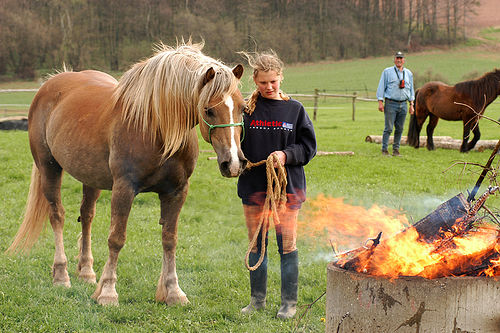

In [3]:
img1 = Image.open('./flickr8r-samples/10815824_2997e03d76.jpg')
img1

In [4]:
!cat ./flickr8r-samples/captions.txt | grep 10815824_2997e03d76.jpg

10815824_2997e03d76.jpg,A blonde horse and a blonde girl in a black sweatshirt are staring at a fire in a barrel .
10815824_2997e03d76.jpg,A girl and her horse stand by a fire .
10815824_2997e03d76.jpg,A girl holding a horse 's lead behind a fire .
10815824_2997e03d76.jpg,"A man , and girl and two horses are near a contained fire ."
10815824_2997e03d76.jpg,Two people and two horses watching a fire .


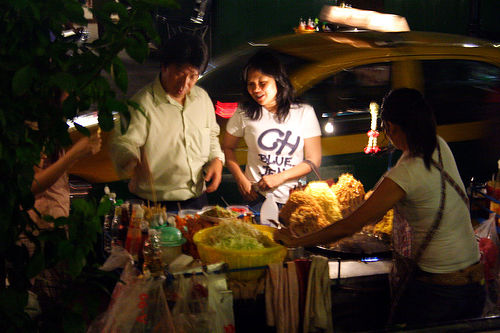

In [5]:
img2 = Image.open('./flickr8r-samples/33108590_d685bfe51c.jpg')
img2

In [6]:
!cat ./flickr8r-samples/captions.txt | grep 33108590_d685bfe51c

33108590_d685bfe51c.jpg,A young couple inspect merchandise from a street vendor .
33108590_d685bfe51c.jpg,People are gathering around a table of food and outside a taxi wisks by .
33108590_d685bfe51c.jpg,Three people prepare a table full of food with a police car in the background .
33108590_d685bfe51c.jpg,two people look at a street vendor .
33108590_d685bfe51c.jpg,Two women and a man at a food counter in dim lights .


In [7]:
print(img1.size)
print(img2.size)
print(img1.mode)
print(img2.mode)

(500, 333)
(500, 333)
RGB
RGB


# Image captioning model

In [8]:
import torch
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image

In [9]:
device = 'cuda:0'

In [10]:
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base", torch_dtype=torch.float16).to(device)

In [11]:
# processor forward
img_inputs = processor([Image.open('./flickr8r-samples/33108590_d685bfe51c.jpg'), 
                        Image.open('./flickr8r-samples/10815824_2997e03d76.jpg')], 
                       return_tensors='pt').to(device, torch.float16)

In [12]:
img_inputs['pixel_values'].shape

torch.Size([2, 3, 384, 384])

In [13]:
out = model.generate(**img_inputs)

/root/miniconda3/envs/nlp_study/lib/python3.8/site-packages/transformers/generation/utils.py:1220: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


In [14]:
out

tensor([[30522,  1037,  2450,  3061,  1999,  2392,  1997,  1037,  2482,   102],
        [30522,  1037,  2177,  1997,  5194,  3061,  2105,  1037,  2543,   102]],
       device='cuda:0')

In [15]:
# processor.tokenizer.convert_ids_to_tokens(out[0])
captions = processor.decode(out[0], skip_special_tokens=True)
print(captions)
captions = processor.decode(out[1], skip_special_tokens=True)
print(captions)

a woman standing in front of a car
a group of horses standing around a fire


In [16]:
processor.tokenizer.special_tokens_map_extended

{'unk_token': AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
 'sep_token': AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
 'pad_token': AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
 'cls_token': AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
 'mask_token': AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True)}

In [17]:
out[0]

tensor([30522,  1037,  2450,  3061,  1999,  2392,  1997,  1037,  2482,   102],
       device='cuda:0')

In [18]:
processor.tokenizer.convert_ids_to_tokens(out[0])

[None, 'a', 'woman', 'standing', 'in', 'front', 'of', 'a', 'car', '[SEP]']

In [19]:
out[1]

tensor([30522,  1037,  2177,  1997,  5194,  3061,  2105,  1037,  2543,   102],
       device='cuda:0')

In [20]:
processor.tokenizer.convert_ids_to_tokens(out[1])

[None,
 'a',
 'group',
 'of',
 'horses',
 'standing',
 'around',
 'a',
 'fire',
 '[SEP]']